<a href="https://colab.research.google.com/github/nour-said/House_Price/blob/main/Copy_of_HousePrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df = pd.read_csv('/content/drive/MyDrive/HousePrices_HalfMil.csv')
print(df)

Mounted at /content/drive
        Area  Garage  FirePlace  Baths  White Marble  Black Marble  \
0        164       2          0      2             0             1   
1         84       2          0      4             0             0   
2        190       2          4      4             1             0   
3         75       2          4      4             0             0   
4        148       1          4      2             1             0   
...      ...     ...        ...    ...           ...           ...   
499995   128       3          4      2             1             0   
499996    30       2          4      5             0             0   
499997   174       3          3      2             0             1   
499998   121       1          4      5             0             1   
499999    46       2          4      4             1             0   

        Indian Marble  Floors  City  Solar  Electric  Fiber  Glass Doors  \
0                   0       0     3      1         1     

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype
---  ------         --------------   -----
 0   Area           500000 non-null  int64
 1   Garage         500000 non-null  int64
 2   FirePlace      500000 non-null  int64
 3   Baths          500000 non-null  int64
 4   White Marble   500000 non-null  int64
 5   Black Marble   500000 non-null  int64
 6   Indian Marble  500000 non-null  int64
 7   Floors         500000 non-null  int64
 8   City           500000 non-null  int64
 9   Solar          500000 non-null  int64
 10  Electric       500000 non-null  int64
 11  Fiber          500000 non-null  int64
 12  Glass Doors    500000 non-null  int64
 13  Swiming Pool   500000 non-null  int64
 14  Garden         500000 non-null  int64
 15  Prices         500000 non-null  int64
dtypes: int64(16)
memory usage: 61.0 MB


In [ ]:
df.isnull().sum()

Area             0
Garage           0
FirePlace        0
Baths            0
White Marble     0
Black Marble     0
Indian Marble    0
Floors           0
City             0
Solar            0
Electric         0
Fiber            0
Glass Doors      0
Swiming Pool     0
Garden           0
Prices           0
dtype: int64

In [ ]:
df.shape

(500000, 16)

In [ ]:
correlation = df.corr()
correlation

,Area,Garage,FirePlace,Baths,White Marble,Black Marble,Indian Marble,Floors,City,Solar,Electric,Fiber,Glass Doors,Swiming Pool,Garden,Prices
Area,1.000000,-0.000897,0.000374,-0.000398,0.002525,-0.001477,-0.001047,-0.000776,-0.003455,0.000526,-0.000128,0.000114,-0.001230,0.000610,0.001428,0.147717
Garage,-0.000897,1.000000,0.001307,-0.003647,0.000541,0.001847,-0.002385,-0.000931,0.000793,0.001480,0.000779,-0.000562,-0.002171,0.001088,-0.000669,0.100294
FirePlace,0.000374,0.001307,1.000000,0.000643,0.000952,-0.000922,-0.000030,0.000185,-0.000211,-0.000309,0.001342,0.001818,-0.000366,0.001295,0.000231,0.089139
Baths,-0.000398,-0.003647,0.000643,1.000000,0.002493,-0.002739,0.000246,-0.000880,-0.000858,-0.000755,0.001047,-0.000687,-0.001668,0.002212,0.001723,0.145087
White Marble,0.002525,0.000541,0.000952,0.002493,1.000000,-0.498893,-0.500723,0.000078,-0.000861,-0.001583,0.000558,-0.000576,-0.000402,-0.001898,0.000959,0.448154
Black Marble,-0.001477,0.001847,-0.000922,-0.002739,-0.498893,1.000000,-0.500383,-0.000368,-0.000324,0.001764,-0.000549,0.000073,0.000086,0.000713,0.000133,-0.078049
Indian Marble,-0.001047,-0.002385,-0.000030,0.000246,-0.500723,-0.500383,1.000000,0.000289,0.001184,-0.000180,-0.000010,0.000503,0.000316,0.001184,-0.001091,-0.369756
Floors,-0.000776,-0.000931,0.000185,-0.000880,0.000078,-0.000368,0.000289,1.000000,-0.000641,-0.002651,0.000082,0.001373,-0.000008,-0.000211,-0.000492,0.619451
City,-0.003455,0.000793,-0.000211,-0.000858,-0.000861,-0.000324,0.001184,-0.000641,1.000000,0.000488,0.000788,-0.002716,0.000770,0.000322,0.001207,0.233259
Solar,0.000526,0.001480,-0.000309,-0.000755,-0.001583,0.001764,-0.000180,-0.002651,0.000488,1.000000,0.001883,0.000238,-0.000817,-0.000466,-0.004263,0.008429


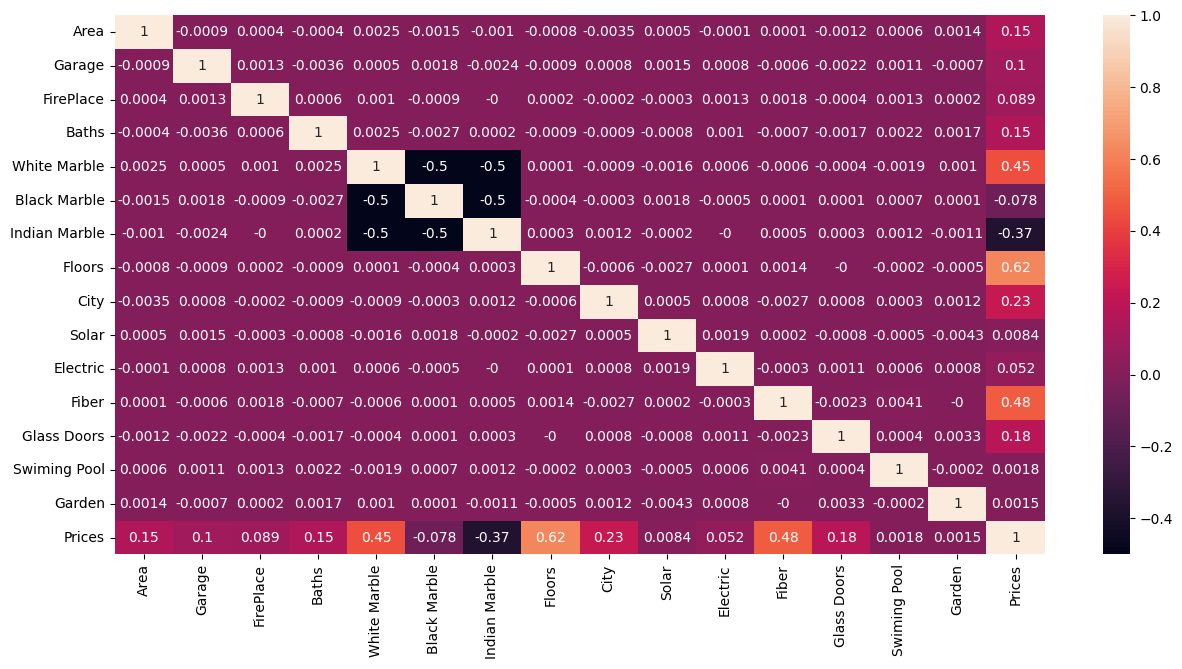

In [ ]:
d = sns.heatmap(df.corr().round(4), annot=True)
d.figure.set_size_inches(15,7)

In [ ]:
#we have 4 columns that affect directly at the price
#1-White Marble
#2-Indian Marble
#3-Floors
#4-City

<Axes: xlabel='White Marble', ylabel='Prices'>

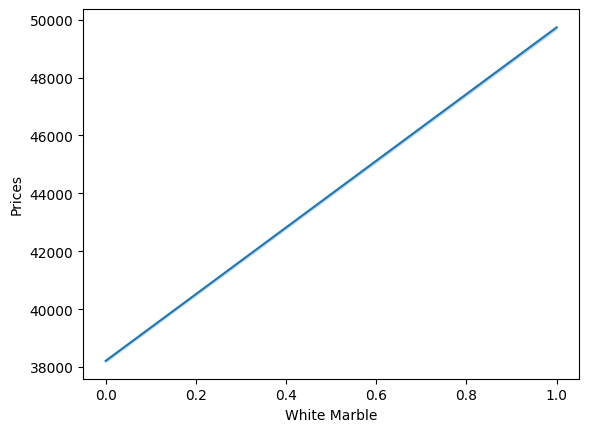

In [ ]:
sns.lineplot(x = df["White Marble"] ,y =  df["Prices"])

<Axes: xlabel='Indian Marble', ylabel='Prices'>

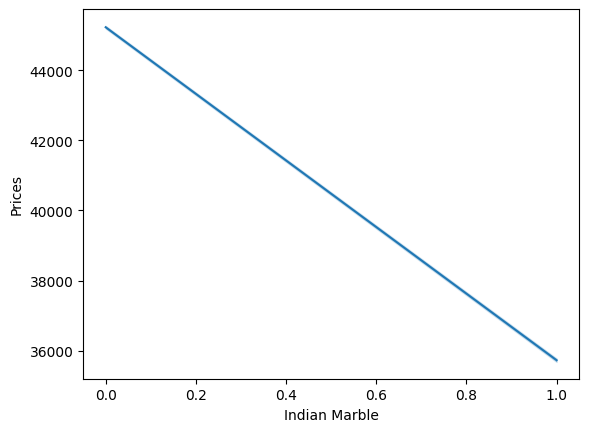

In [ ]:
sns.lineplot(x = df["Indian Marble"] ,y =  df["Prices"])


<Axes: xlabel='Floors', ylabel='Prices'>

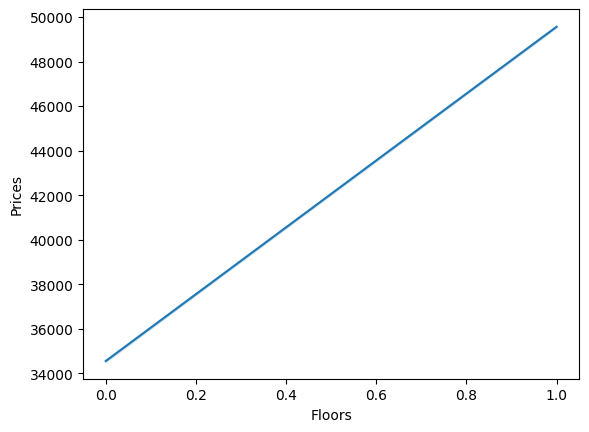

In [ ]:
sns.lineplot(x = df["Floors"] ,y =  df["Prices"])


<Axes: xlabel='City', ylabel='Prices'>

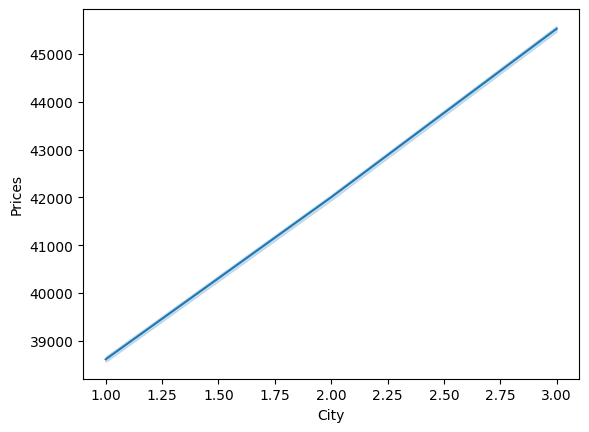

In [ ]:
sns.lineplot(x = df["City"] ,y =  df["Prices"])


<Axes: xlabel='Fiber', ylabel='Prices'>

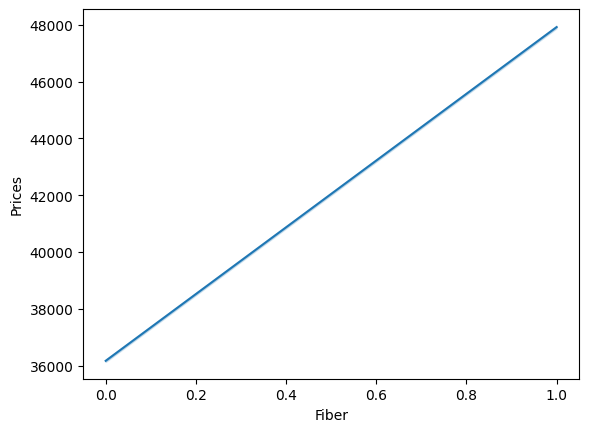

In [ ]:
sns.lineplot(x = df["Fiber"] ,y =  df["Prices"])


In [ ]:
X = df.drop(columns = ['Prices'])
Y = df['Prices']

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif

test = SelectKBest(score_func=chi2, k=15)

fit = test.fit(X, Y)
np.set_printoptions(precision=6)
print(fit.scores_)

X = fit.transform(X)

print(X[0:5,:])


[657053.125909   2892.509177   7296.19405   10162.069685  72952.062846
  12900.740188  48910.10879   99540.745249  12342.479444   1348.170862
   2123.481676  60778.701617  11446.217499   1291.063302   1359.565186]
[[164   2   0   2   0   1   0   0   3   1   1   1   1   0   0]
 [ 84   2   0   4   0   0   1   1   2   0   0   0   1   1   1]
 [190   2   4   4   1   0   0   0   2   0   0   1   0   0   0]
 [ 75   2   4   4   0   0   1   1   1   1   1   1   1   1   1]
 [148   1   4   2   1   0   0   1   2   1   0   0   1   1   1]]


In [ ]:
from sklearn.linear_model import LinearRegression , Ridge , Lasso
from sklearn.model_selection import train_test_split

lr = LinearRegression()

X_train , X_test , Y_train , Y_test = train_test_split(X,Y,random_state = 0, test_size = 0.2 )

lr.fit(X_train, Y_train)

LinearRegression()

In [ ]:
pre = lr.predict(X_test)
res = pd.DataFrame({"Actual_Price" : Y_test, "Predicted_Price" : pre})
res.head()

,Actual_Price,Predicted_Price
194257,27125,27125.0
396319,42925,42925.0
138738,53550,53550.0
66570,53650,53650.0
149424,37350,37350.0


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(Y_test , pre)
r2

1.0